In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Prep

In [2]:
# Reading all the Legal Menu Summary Information
august_summary = pd.read_excel('Monthly Summary Report (2024-05).xlsx', dtype=str, keep_default_na=False)
december_summary = pd.read_excel('Monthly Summary Report (2024-06).xlsx', dtype=str, keep_default_na=False)
february_summary = pd.read_excel('Monthly Summary Report (2024-07).xlsx', dtype=str, keep_default_na=False)
january_summary = pd.read_excel('Monthly Summary Report (2024-08).xlsx', dtype=str, keep_default_na=False)
july_summary = pd.read_excel('Monthly Summary Report (2024-09).xlsx', dtype=str, keep_default_na=False)
june_summary = pd.read_excel('Monthly Summary Report (2024-10).xlsx', dtype=str, keep_default_na=False)
march_summary = pd.read_excel('Monthly Summary Report (2024-11).xlsx', dtype=str, keep_default_na=False)
may_summary = pd.read_excel('Monthly Summary Report (2024-12).xlsx', dtype=str, keep_default_na=False)
november_summary = pd.read_excel('Monthly Summary Report (2025-01).xlsx', dtype=str, keep_default_na=False)
october_summary = pd.read_excel('Monthly Summary Report (2025-02).xlsx')
september_summary = pd.read_excel('Monthly Summary Report (2025-03).xlsx', dtype=str, keep_default_na=False)

/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/Users/alexbarbie/anaconda3/lib/python3.10/site-pack

In [3]:
def header_cleaning(df):
    df.rename(columns={'Time Zone: (UTC-05:00) Central Daylight Time (America/Chicago)': 'Legal_Menu_Option',
                       'Time Zone: (UTC-06:00) Central Standard Time (America/Chicago)': 'Legal_Menu_Option',
                       'Unnamed: 1': 'Menu_Selection',
                       'Unnamed: 2': 'Queue_Selection',
                       'Unnamed: 3': 'Group_Suboption',
                       'Unnamed: 4': 'First_Queue_Name',
                       'Unnamed: 5': 'Final_Queue_Name',
                       'Unnamed: 6': 'Total_Calls',
                       'Unnamed: 7': 'Live_Queued_Calls',
                       'Unnamed: 8': 'Callback_Queued_Calls',
                       'Unnamed: 9': 'Closed_Queue_Calls',
                       'Unnamed: 10': 'Abandoned_Calls'
                       }, inplace= True)
    df = df.iloc[2:]
    df.replace('', pd.NA, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df.reset_index(inplace = True, drop = True)
    return df

In [4]:
january_summary = header_cleaning(january_summary)
february_summary = header_cleaning(february_summary)
march_summary = header_cleaning(march_summary)
may_summary = header_cleaning(may_summary)
june_summary = header_cleaning(june_summary)
july_summary = header_cleaning(july_summary)
august_summary = header_cleaning(august_summary)
september_summary = header_cleaning(september_summary)
october_summary = header_cleaning(october_summary)
november_summary = header_cleaning(november_summary)

all_datasets = [january_summary, february_summary, march_summary, may_summary, june_summary, july_summary, august_summary, september_summary, october_summary, november_summary]

/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_7364/1202797010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('', pd.NA, inplace=True)
/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_7364/1202797010.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(method='ffill', inplace=True)
/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_7364/1202797010.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [5]:
combined = pd.DataFrame(columns=january_summary.columns)
for dataset in all_datasets:
    combined = pd.concat([combined, dataset[:len(dataset) - 1]], axis = 0)

In [7]:
combined.head()

,Legal_Menu_Option,Menu_Selection,Queue_Selection,Group_Suboption,First_Queue_Name,Final_Queue_Name,Total_Calls,Live_Queued_Calls,Callback_Queued_Calls,Closed_Queue_Calls,Abandoned_Calls
0,ADAPT,All Other Issues,ADAPT,ADAPT,N/A,N/A,9,0,0.0,9,0
1,ADAPT,Child Support,ADAPT,ADAPT,N/A,N/A,1,0,0.0,1,0
2,ADAPT,Housing Other,ADAPT,ADAPT,N/A,N/A,1,0,0.0,1,0
3,ADAPT,N/A,ADAPT,ADAPT,ADAPT,ADAPT,4,1,3.0,0,1
4,ADAPT,N/A,ADAPT,ADAPT,ADAPT SP,ADAPT SP,1,0,1.0,0,0


In [10]:
combined["Total_Calls"] = pd.to_numeric(combined["Total_Calls"], errors="coerce")
combined["Live_Queued_Calls"] = pd.to_numeric(combined["Live_Queued_Calls"], errors="coerce")
combined["Callback_Queued_Calls"] = pd.to_numeric(combined["Callback_Queued_Calls"], errors="coerce")
combined["Closed_Queue_Calls"] = pd.to_numeric(combined["Closed_Queue_Calls"], errors="coerce")
combined["Abandoned_Calls"] = pd.to_numeric(combined["Abandoned_Calls"], errors="coerce")


## Question/Goal 1

In [17]:
menu_counts = combined.groupby(['Menu_Selection', 'Queue_Selection', 'Group_Suboption'])['Total_Calls'].sum().reset_index()
low_usage = menu_counts[menu_counts['Total_Calls'] <= 1]

low_usage.sort_values(by='Total_Calls')


,Menu_Selection,Queue_Selection,Group_Suboption,Total_Calls
10,All Other Issues,Employment,Wages,1
162,Simple Divorce,Immigration,Visa or Crime Victim,1
160,Simple Divorce,Family,Name Change,1
156,Simple Divorce,Education,Education,1
155,Simple Divorce,ADAPT,ADAPT,1
143,Personal Injury,Family,Other,1
142,Personal Injury,Family,DV or Sexual Assault,1
140,Personal Injury,Employment,Wages,1
139,Personal Injury,Employment,Other Employment,1
138,Personal Injury,Education,Education,1


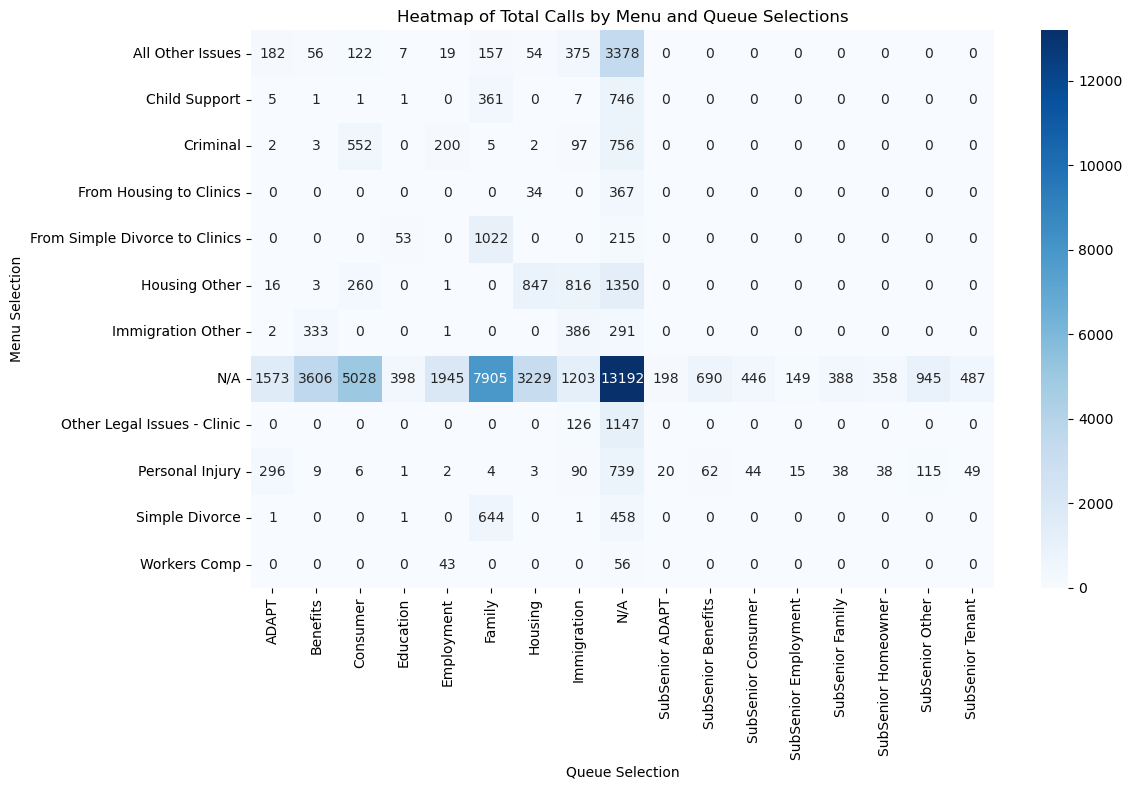

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_calls = combined.pivot_table(
    values='Total_Calls',
    index='Menu_Selection',
    columns='Queue_Selection',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_calls, cmap='Blues', annot=True, fmt='g')
plt.title('Heatmap of Total Calls by Menu and Queue Selections')
plt.ylabel('Menu Selection')
plt.xlabel('Queue Selection')
plt.tight_layout()
plt.show()


In [15]:
grouped_calls = combined.groupby("Legal_Menu_Option")["Total_Calls"].sum().reset_index()

grouped_calls = grouped_calls.sort_values(by="Total_Calls", ascending=False)

grouped_calls

,Legal_Menu_Option,Total_Calls
5,Family,12130
9,Legal,9117
7,Housing,8927
11,Pre-Legal Seniors,7021
10,Other Legal,6512
1,Benefits,4283
2,Consumer,3470
4,Employment,2332
8,Immigration,1983
3,Criminal Records,1170


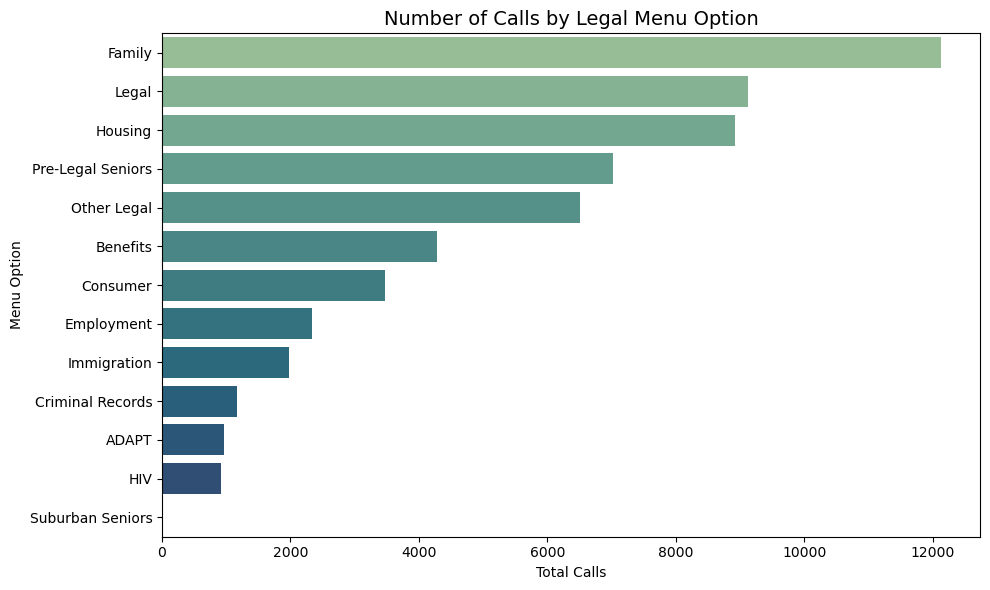

In [16]:
sorted_df = grouped_calls.sort_values("Total_Calls", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_df, y="Legal_Menu_Option", x="Total_Calls", palette="crest")

plt.title("Number of Calls by Legal Menu Option", fontsize=14)
plt.xlabel("Total Calls")
plt.ylabel("Menu Option")
plt.tight_layout()
plt.show()


In [56]:
grouped = combined.groupby("Legal_Menu_Option")[call_columns].sum().reset_index()

grouped["% Live"] = grouped["Live_Queued_Calls"] / grouped["Total_Calls"]
grouped["% Callback"] = grouped["Callback_Queued_Calls"] / grouped["Total_Calls"]
grouped["% Closed"] = grouped["Closed_Queue_Calls"] / grouped["Total_Calls"]
grouped["% Abandoned"] = grouped["Abandoned_Calls"] / grouped["Total_Calls"]

outcomes_pct = grouped[["Legal_Menu_Option", "% Live", "% Callback", "% Closed", "% Abandoned"]]

In [57]:
outcomes_pct

,Legal_Menu_Option,% Live,% Callback,% Closed,% Abandoned
0,ADAPT,0.014478,0.057911,0.919338,0.023785
1,Benefits,0.021947,0.088256,0.818352,0.024049
2,Consumer,0.015850,0.095677,0.885014,0.024207
3,Criminal Records,0.000000,0.000000,0.000000,0.023932
4,Employment,0.016724,0.093053,0.829760,0.017581
5,Family,0.013190,0.077329,0.751772,0.020940
6,HIV,0.000000,0.000000,0.000000,0.009772
7,Housing,0.016019,0.075725,0.575557,0.017139
8,Immigration,0.010590,0.040343,0.722642,0.026223
9,Legal,0.000658,0.004278,0.032247,0.002194


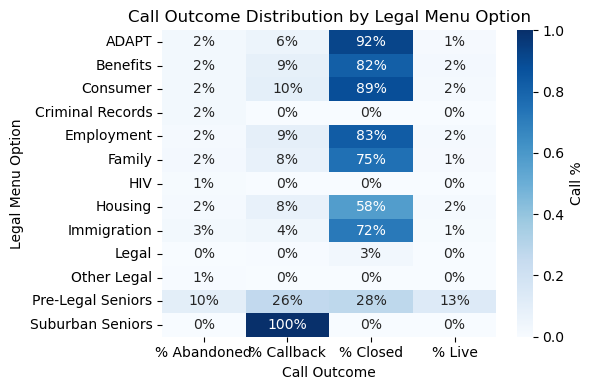

In [58]:
melted_outcomes = outcomes_pct.melt(id_vars="Legal_Menu_Option", var_name="Outcome", value_name="Percentage")

pivot = melted_outcomes.pivot(index="Legal_Menu_Option", columns="Outcome", values="Percentage")

plt.figure(figsize=(6, 4))
sns.heatmap(pivot, annot=True, fmt=".0%", cmap="Blues", cbar_kws={'label': 'Call %'})
plt.title("Call Outcome Distribution by Legal Menu Option")
plt.xlabel("Call Outcome")
plt.ylabel("Legal Menu Option")
plt.tight_layout()
plt.show()


In [62]:
queue_path_counts = combined.groupby('Final_Queue_Name').agg(
    num_unique_paths=pd.NamedAgg(column='Menu_Selection', aggfunc='nunique'),
    total_calls=pd.NamedAgg(column='Total_Calls', aggfunc='sum')
).reset_index()

multiple_paths = queue_path_counts[queue_path_counts['num_unique_paths'] > 4]
multiple_paths.sort_values(by='num_unique_paths', ascending=False)

,Final_Queue_Name,num_unique_paths,total_calls
8,Clinic Voicemail Transfer,12,7230
30,N/A,9,38644
34,Staff Directory Spanish Transfer,7,492
9,Consumer,6,643
19,Family,6,1018
16,Employment,5,361
22,Front Desk Transfer,5,2093


## Question/Goal 2

In [31]:
special_lines = ['HIV', 'Veterans', 'Criminal Records', 'Clinic']

special_df = combined[combined['Final_Queue_Name'].str.contains('|'.join(special_lines), case=False, na=False)]

direct_calls = special_df[special_df['Menu_Selection'].isna() | (special_df['Menu_Selection'] == 'N/A')]['Total_Calls'].sum()
transferred_calls = special_df[~special_df['Menu_Selection'].isna() & (special_df['Menu_Selection'] != 'N/A')]['Total_Calls'].sum()

total_special_calls = direct_calls + transferred_calls
direct_percent = direct_calls / total_special_calls
transferred_percent = transferred_calls / total_special_calls

print(f"Direct calls: {direct_calls} ({direct_percent:.2%})")
print(f"Transferred calls: {transferred_calls} ({transferred_percent:.2%})")

Direct calls: 5458 (59.74%)
Transferred calls: 3679 (40.26%)


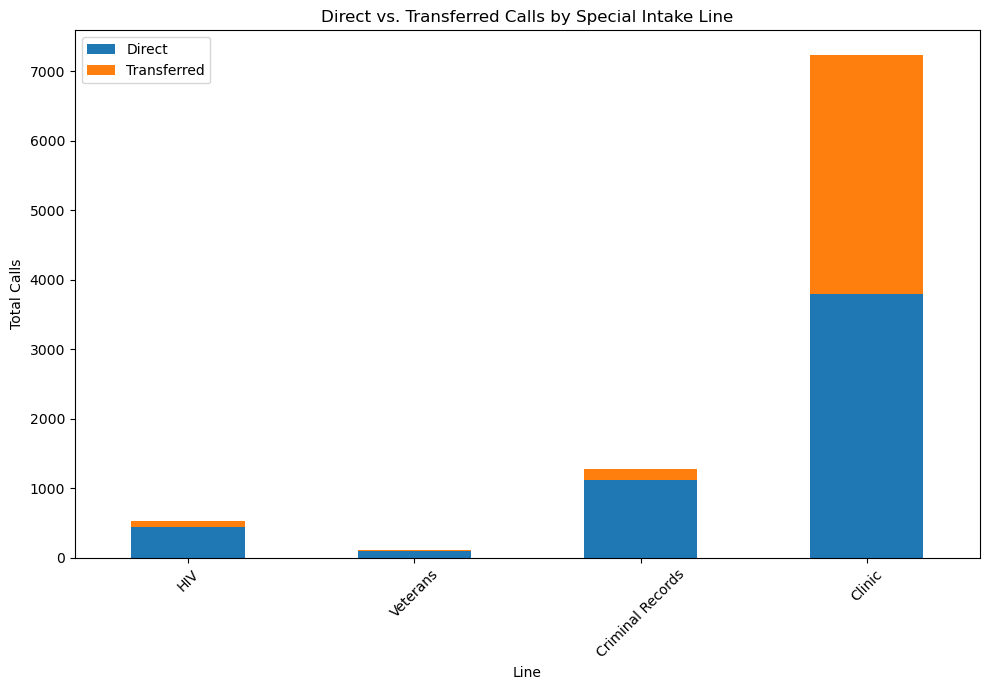

In [30]:
special_lines = ['HIV', 'Veterans', 'Criminal Records', 'Clinic']
results = []

for line in special_lines:
    line_df = combined[combined['Final_Queue_Name'].str.contains(line, case=False, na=False)]
    direct = line_df[line_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
    transferred = line_df[~line_df['Menu_Selection'].isin(['N/A', None])]['Total_Calls'].sum()
    results.append({'Line': line, 'Direct': direct, 'Transferred': transferred})

results_df = pd.DataFrame(results).set_index('Line')

results_df.plot(kind='bar', stacked=True, figsize=(10,7))
plt.title('Direct vs. Transferred Calls by Special Intake Line')
plt.ylabel('Total Calls')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/pn/x9fcnf2n3jqg3z73g1d6csx00000gn/T/ipykernel_7364/2465351195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Total_Calls"] = pd.to_numeric(df_filtered["Total_Calls"], errors="coerce")


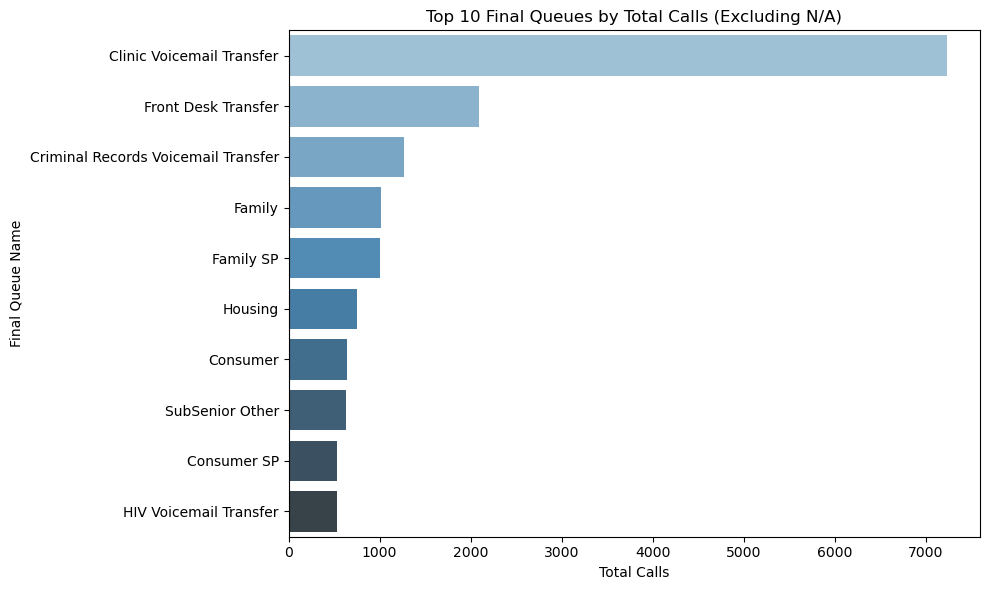

In [32]:
combined["Final_Queue_Name"] = combined["Final_Queue_Name"].astype(str).str.strip()

na_values = ["", "N/A", "NA", "n/a", "nan", "None"]

df_filtered = combined[~combined["Final_Queue_Name"].isin(na_values)]

df_filtered["Total_Calls"] = pd.to_numeric(df_filtered["Total_Calls"], errors="coerce")

queue_totals = (
    df_filtered.groupby("Final_Queue_Name")["Total_Calls"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=queue_totals.values, y=queue_totals.index, palette="Blues_d")

plt.title("Top 10 Final Queues by Total Calls (Excluding N/A)")
plt.xlabel("Total Calls")
plt.ylabel("Final Queue Name")
plt.tight_layout()
plt.show()


## Question/Goal 3

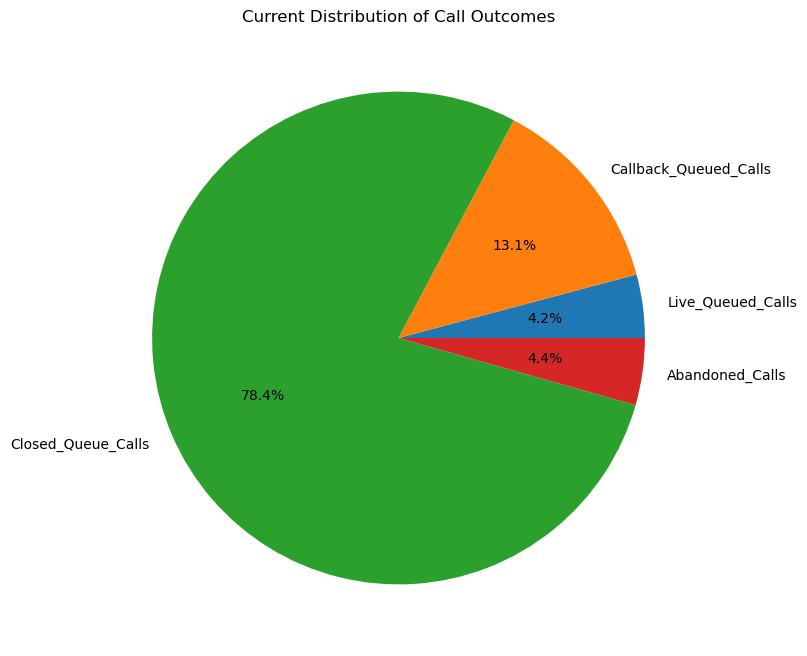

In [18]:
outcome_cols = ['Live_Queued_Calls', 'Callback_Queued_Calls', 'Closed_Queue_Calls', 'Abandoned_Calls']
outcomes_sum = combined[outcome_cols].sum()

outcomes_sum.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title('Current Distribution of Call Outcomes')
plt.ylabel('')
plt.show()

In [19]:
senior_df = combined[combined['Final_Queue_Name'].str.contains('Senior', case=False, na=False)]
regular_df = combined[~combined['Final_Queue_Name'].str.contains('Senior', case=False, na=False)]

senior_live_rate = senior_df['Live_Queued_Calls'].sum() / senior_df['Total_Calls'].sum()
regular_live_rate = regular_df['Live_Queued_Calls'].sum() / regular_df['Total_Calls'].sum()

print(f"Senior live service rate: {senior_live_rate:.2%}")
print(f"Regular live service rate: {regular_live_rate:.2%}")

Senior live service rate: 33.26%
Regular live service rate: 1.00%


In [21]:
combined["Final_Queue_Name"] = combined["Final_Queue_Name"].astype(str).str.strip()

is_subsenior = combined["Final_Queue_Name"].str.contains("SubSenior", case=False, na=False)

subsenior_calls = combined.loc[is_subsenior, "Total_Calls"].sum()

total_calls = combined["Total_Calls"].sum()

percent_subsenior = subsenior_calls / total_calls

print(f"Total calls to SubSenior queues: {subsenior_calls:,}")
print(f"Total calls overall: {total_calls:,}")
print(f"Percentage of total calls to SubSenior queues: {percent_subsenior:.2%}")


Total calls to SubSenior queues: 2,667
Total calls overall: 58,834
Percentage of total calls to SubSenior queues: 4.53%


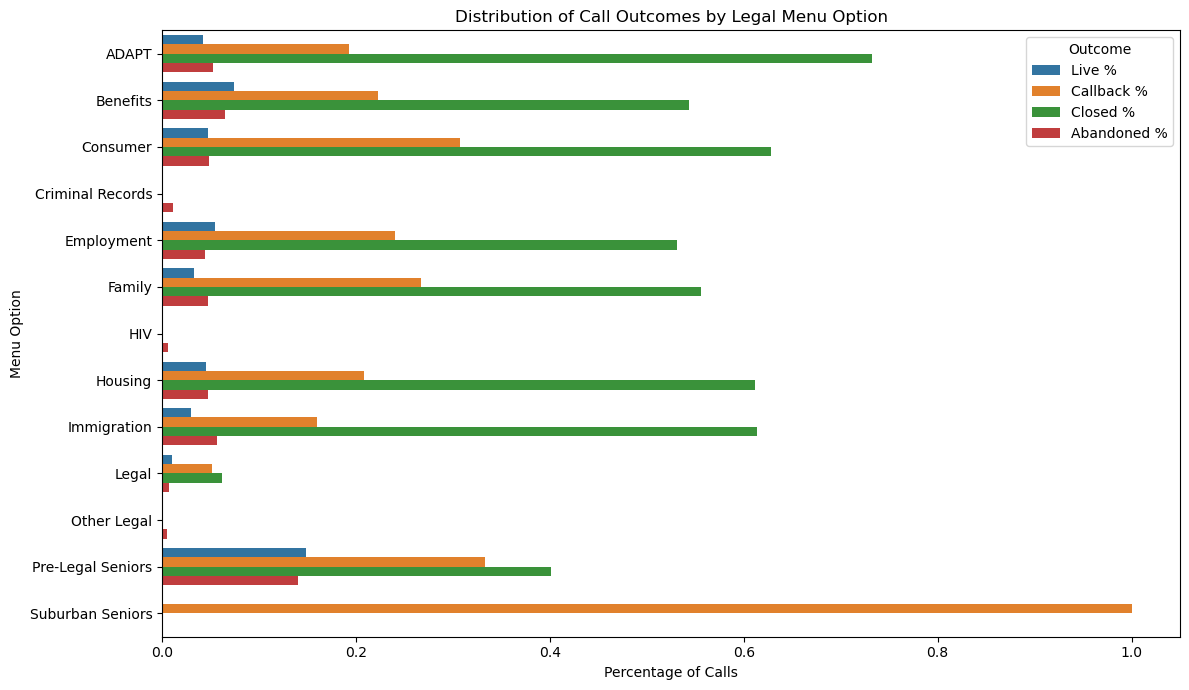

In [39]:
combined["Live %"] = combined["Live_Queued_Calls"] / combined["Total_Calls"]
combined["Callback %"] = combined["Callback_Queued_Calls"] / combined["Total_Calls"]
combined["Closed %"] = combined["Closed_Queue_Calls"] / combined["Total_Calls"]
combined["Abandoned %"] = combined["Abandoned_Calls"] / combined["Total_Calls"]

melted = combined.melt(
    id_vars=["Legal_Menu_Option"],
    value_vars=["Live %", "Callback %", "Closed %", "Abandoned %"],
    var_name="Outcome Type",
    value_name="Percentage"
)

plt.figure(figsize=(12, 7))
sns.barplot(data=melted, x="Percentage", y="Legal_Menu_Option", hue="Outcome Type", errorbar=None)
plt.title("Distribution of Call Outcomes by Legal Menu Option")
plt.xlabel("Percentage of Calls")
plt.ylabel("Menu Option")
plt.legend(title="Outcome")
plt.tight_layout()
plt.show()


In [49]:
cols = [
    "Total_Calls", 
    "Live_Queued_Calls", 
    "Callback_Queued_Calls", 
    "Closed_Queue_Calls", 
    "Abandoned_Calls"
]

legal_summary = (
    combined.groupby("Legal_Menu_Option")[cols]
    .sum()
    .sort_values(by="Total_Calls", ascending=False)
    .reset_index()
)


In [50]:
legal_summary

,Legal_Menu_Option,Total_Calls,Live_Queued_Calls,Callback_Queued_Calls,Closed_Queue_Calls,Abandoned_Calls
0,Family,12130,160,938.0,9119,254
1,Legal,9117,6,39.0,294,20
2,Housing,8927,143,676.0,5138,153
3,Pre-Legal Seniors,7021,915,1849.0,1935,731
4,Other Legal,6512,0,0.0,0,34
5,Benefits,4283,94,378.0,3505,103
6,Consumer,3470,55,332.0,3071,84
7,Employment,2332,39,217.0,1935,41
8,Immigration,1983,21,80.0,1433,52
9,Criminal Records,1170,0,0.0,0,28


In [75]:
live_answered_df = combined.groupby('Legal_Menu_Option').agg({
    'Total_Calls': 'sum',
    'Live_Queued_Calls': 'sum'
}).reset_index()

live_answered_df['Live_Answer_Pct'] = (live_answered_df['Live_Queued_Calls'] / 
                                       live_answered_df['Total_Calls']) * 100

live_answered_df = live_answered_df.sort_values('Live_Answer_Pct', ascending=False)


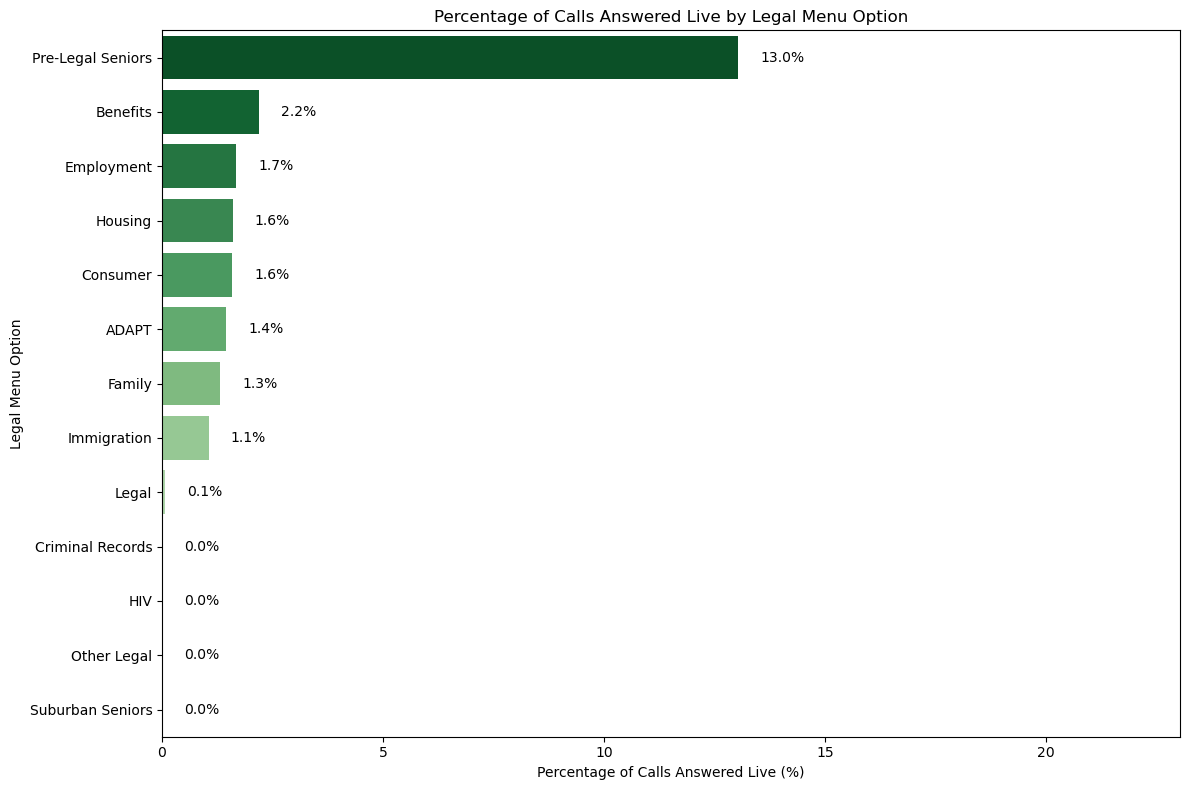

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=live_answered_df, 
    x='Live_Answer_Pct', 
    y='Legal_Menu_Option',
    palette='Greens_r'
)

for index, value in enumerate(live_answered_df['Live_Answer_Pct']):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.xlabel('Percentage of Calls Answered Live (%)')
plt.ylabel('Legal Menu Option')
plt.title('Percentage of Calls Answered Live by Legal Menu Option')

plt.xlim(0, live_answered_df['Live_Answer_Pct'].max() + 10)
plt.tight_layout()
plt.show()


## Other Code

In [44]:
combined['Menu_Selection'].unique()
combined['Queue_Selection'].unique()
combined['Group_Suboption'].unique()
combined['Final_Queue_Name'].unique()

array(['N/A', 'ADAPT', 'ADAPT SP', 'Clinic Voicemail Transfer',
       'Benefits', 'Benefits SP', 'Veterans Benefits Voicemail Transfer',
       'Consumer', 'Consumer SP', 'Criminal Records Voicemail Transfer',
       'Employment', 'Employment SP', 'Family', 'Family SP', 'Education',
       'Education SP', 'HIV Voicemail Transfer', 'Housing', 'Housing SP',
       'Immigration', 'Trafficking Voicemail Transfer', 'Immigration SP',
       'Front Desk Transfer', 'Staff Directory English Transfer',
       'Staff Directory Spanish Transfer', 'SubSenior ADAPT',
       'Benefits SubSeniors', 'SubSenior Benefits',
       'SubSenior Benefits SP', 'SubSenior Consumer',
       'SubSenior Consumer SP', 'SubSenior Employment',
       'SubSenior Employment SP', 'SubSenior Family',
       'SubSenior Family SP', 'SubSenior Homeowner',
       'Other SubSeniors SP', 'SubSenior Other', 'SubSenior Other SP',
       'SubSenior Tenant', 'Consumer SubSeniors', 'Family SubSeniors',
       'Other SubSeniors', '

In [52]:
call_columns = [
    "Total_Calls", 
    "Live_Queued_Calls", 
    "Callback_Queued_Calls", 
    "Closed_Queue_Calls", 
    "Abandoned_Calls"
]

In [53]:
na_like = ["", "N/A", "NA", "n/a", "nan", "None"]
combined["Final_Queue_Name"] = combined["Final_Queue_Name"].astype(str).str.strip()
df_clean = combined[~combined["Final_Queue_Name"].isin(na_like)]

summary_table = (
    df_clean.groupby("Final_Queue_Name")[call_columns]
    .sum()
    .sort_values(by="Total_Calls", ascending=False)
    .reset_index()
)

summary_table["% Live"] = summary_table["Live_Queued_Calls"] / summary_table["Total_Calls"]
summary_table["% Callback"] = summary_table["Callback_Queued_Calls"] / summary_table["Total_Calls"]
summary_table["% Closed"] = summary_table["Closed_Queue_Calls"] / summary_table["Total_Calls"]
summary_table["% Abandoned"] = summary_table["Abandoned_Calls"] / summary_table["Total_Calls"]

In [54]:
summary_table

,Final_Queue_Name,Total_Calls,Live_Queued_Calls,Callback_Queued_Calls,Closed_Queue_Calls,Abandoned_Calls,% Live,% Callback,% Closed,% Abandoned
0,Clinic Voicemail Transfer,7230,0,0.0,4913,311,0.000000,0.000000,0.679530,0.043015
1,Front Desk Transfer,2093,0,0.0,0,16,0.000000,0.000000,0.000000,0.007645
2,Criminal Records Voicemail Transfer,1271,0,0.0,0,28,0.000000,0.000000,0.000000,0.022030
3,Family,1018,143,779.0,36,121,0.140472,0.765226,0.035363,0.118861
4,Family SP,999,13,107.0,747,18,0.013013,0.107107,0.747748,0.018018
5,Housing,754,95,432.0,63,64,0.125995,0.572944,0.083554,0.084881
6,Consumer,643,96,545.0,0,88,0.149300,0.847589,0.000000,0.136858
7,SubSenior Other,632,215,417.0,0,166,0.340190,0.659810,0.000000,0.262658
8,Consumer SP,535,11,48.0,474,9,0.020561,0.089720,0.885981,0.016822
9,HIV Voicemail Transfer,532,0,0.0,8,9,0.000000,0.000000,0.015038,0.016917


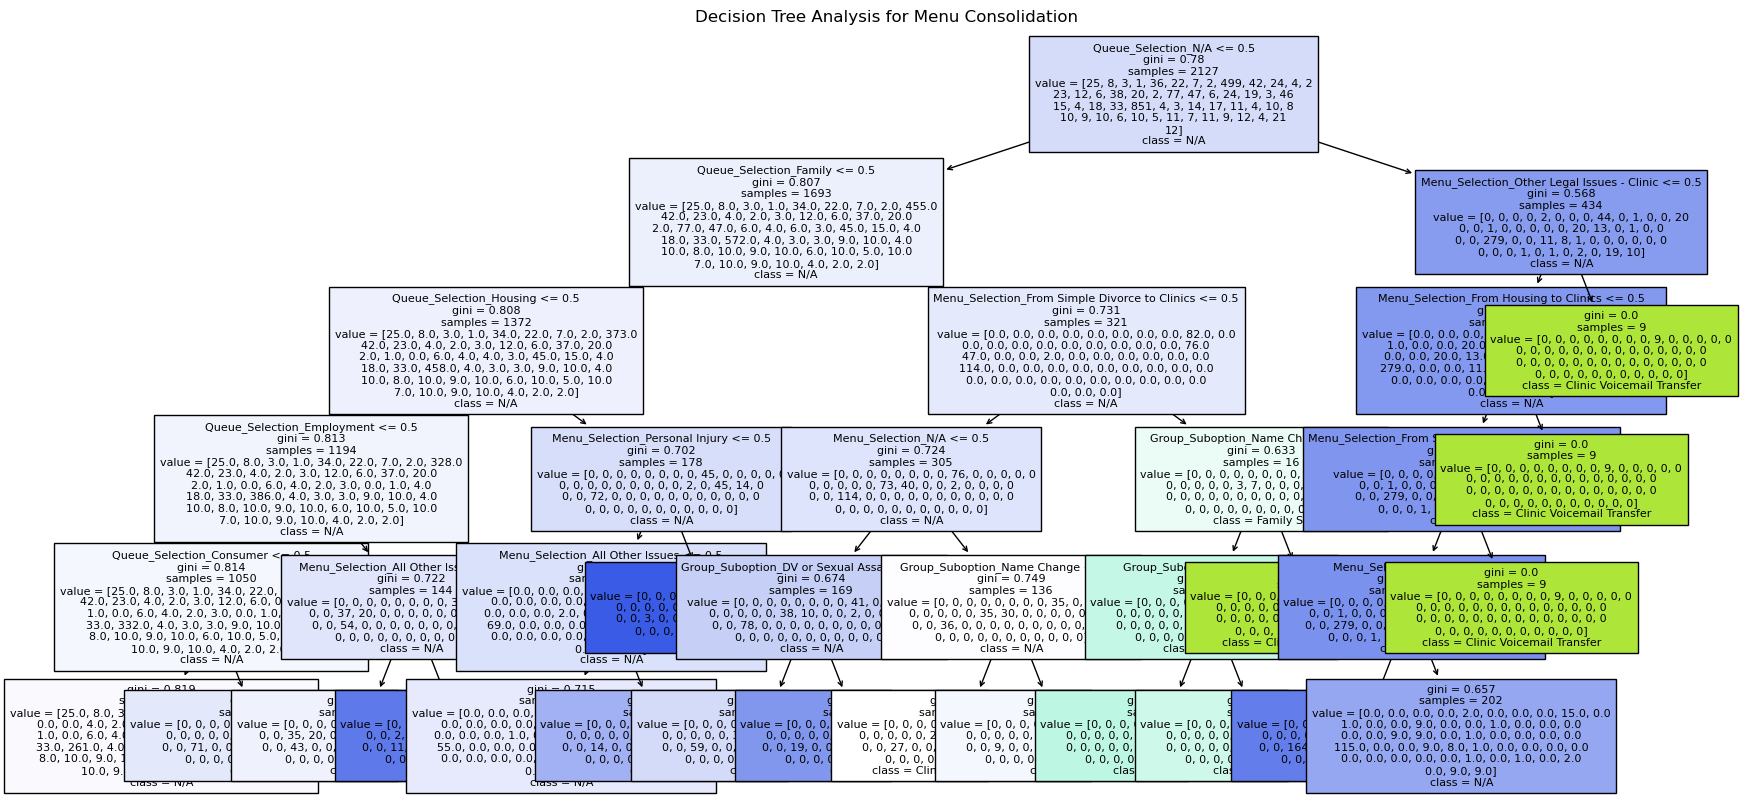

In [66]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

features = pd.get_dummies(combined[['Menu_Selection', 'Queue_Selection', 'Group_Suboption']])
target = combined['Final_Queue_Name']

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(features, target)

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=features.columns, class_names=dt.classes_, filled=True, fontsize=8)
plt.title('Decision Tree Analysis for Menu Consolidation')
plt.show()

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

heatmap_data = combined.groupby(['Menu_Selection', 'Queue_Selection']).agg({
    'Live_Queued_Calls': 'sum',
    'Callback_Queued_Calls': 'sum',
    'Closed_Queue_Calls': 'sum',
    'Abandoned_Calls': 'sum'
}).reset_index()

heatmap_data['Total_Calls'] = heatmap_data[
    ['Live_Queued_Calls', 'Callback_Queued_Calls', 'Closed_Queue_Calls', 'Abandoned_Calls']
].sum(axis=1)

heatmap_data = heatmap_data[heatmap_data['Total_Calls'] > 5]

heatmap_data.head()


,Menu_Selection,Queue_Selection,Live_Queued_Calls,Callback_Queued_Calls,Closed_Queue_Calls,Abandoned_Calls,Total_Calls
0,All Other Issues,ADAPT,3,10.0,168,4,185.0
1,All Other Issues,Benefits,1,3.0,52,2,58.0
2,All Other Issues,Consumer,0,6.0,114,0,120.0
3,All Other Issues,Education,0,1.0,6,0,7.0
4,All Other Issues,Employment,0,2.0,17,0,19.0


In [70]:
for outcome in ['Live_Queued_Calls', 'Callback_Queued_Calls', 'Closed_Queue_Calls', 'Abandoned_Calls']:
    heatmap_data[outcome + '_Pct'] = (heatmap_data[outcome] / heatmap_data['Total_Calls']) * 100

pivot_live = heatmap_data.pivot(
    index='Menu_Selection', 
    columns='Queue_Selection', 
    values='Live_Queued_Calls_Pct'
).fillna(0)

pivot_live.head()


Queue_Selection,ADAPT,Benefits,Consumer,Education,Employment,Family,Housing,Immigration,N/A,SubSenior ADAPT,SubSenior Benefits,SubSenior Consumer,SubSenior Employment,SubSenior Family,SubSenior Homeowner,SubSenior Other,SubSenior Tenant
Menu_Selection,,,,,,,,,,,,,,,,,
All Other Issues,1.621622,1.724138,0.000000,0.000000,0.000000,0.000000,1.785714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Child Support,0.000000,0.000000,0.000000,0.000000,0.000000,0.769231,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Criminal,0.000000,0.000000,2.088167,0.000000,2.040816,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
From Housing to Clinics,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
From Simple Divorce to Clinics,0.000000,0.000000,0.000000,1.851852,0.000000,1.418440,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


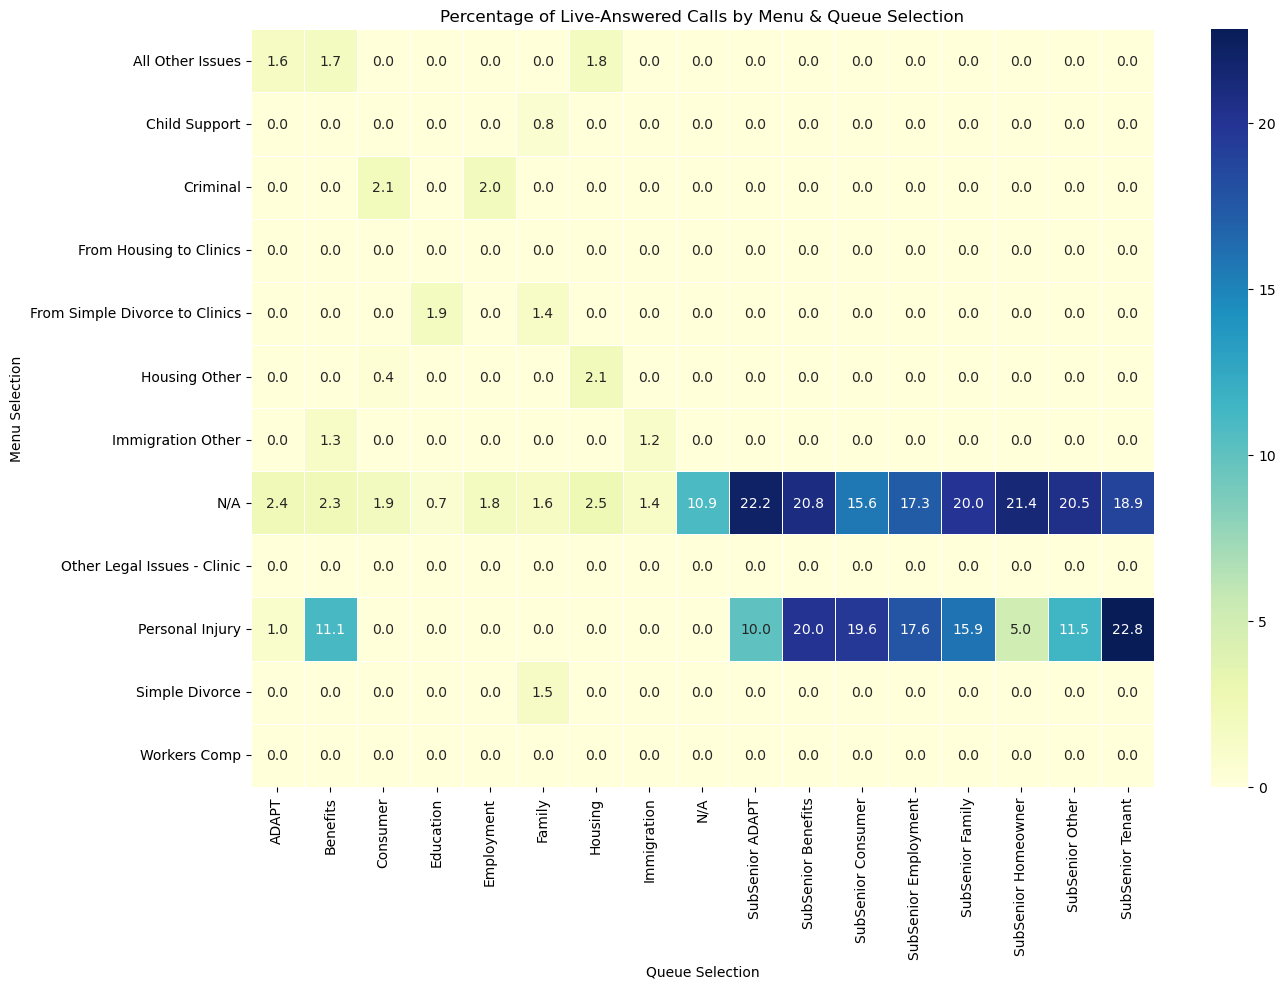

In [71]:
plt.figure(figsize=(14, 10))

sns.heatmap(pivot_live, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)

plt.title("Percentage of Live-Answered Calls by Menu & Queue Selection")
plt.xlabel("Queue Selection")
plt.ylabel("Menu Selection")

plt.tight_layout()
plt.show()


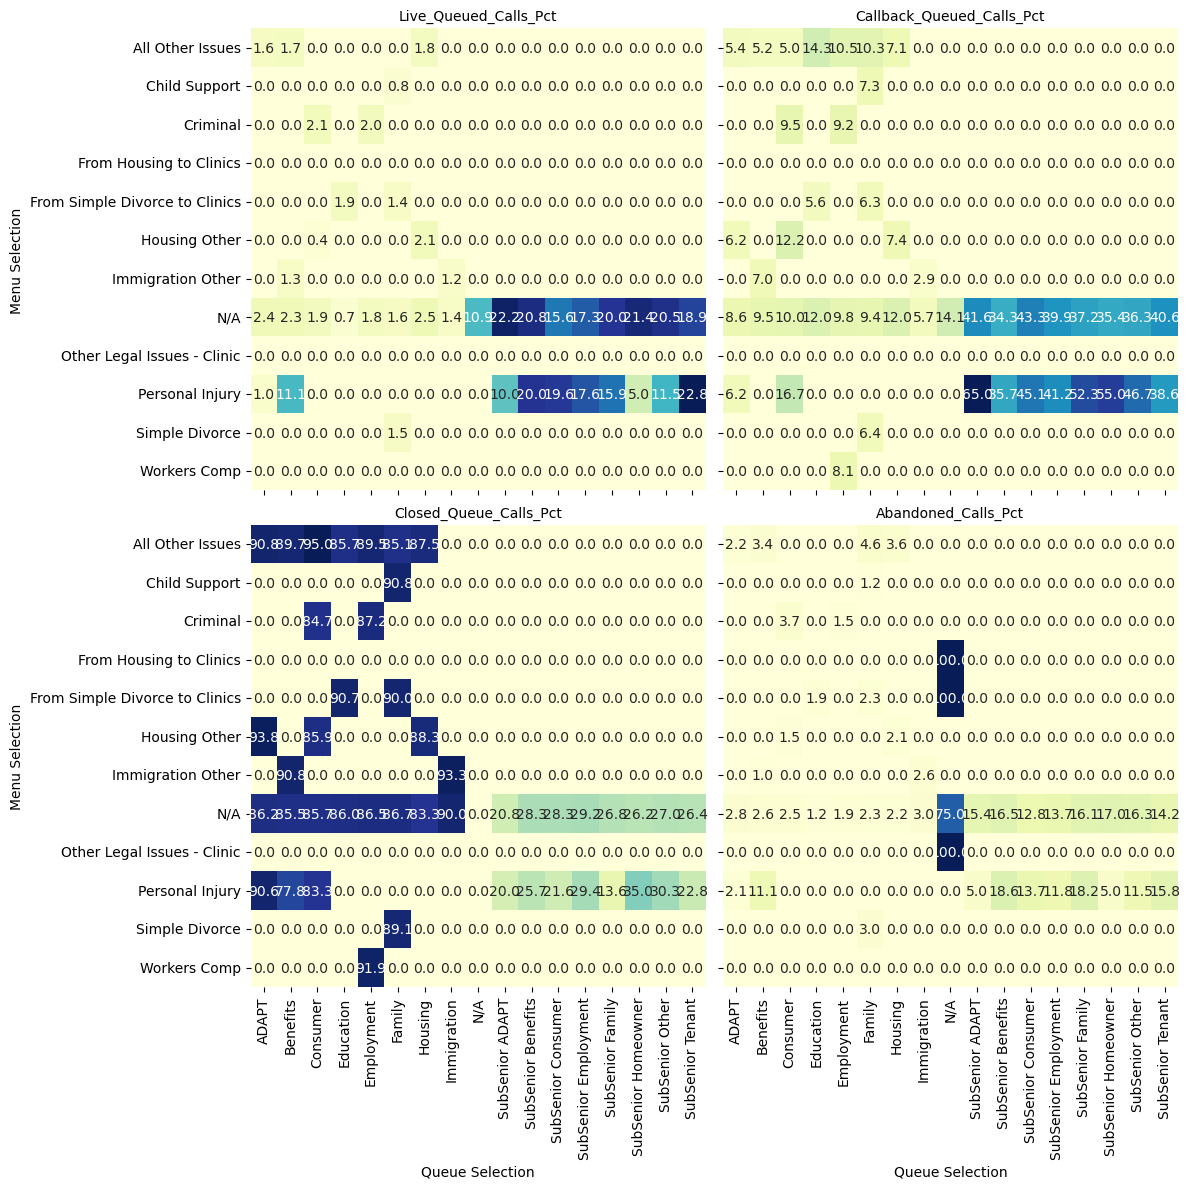

In [72]:
melted = pd.melt(
    heatmap_data,
    id_vars=['Menu_Selection', 'Queue_Selection'],
    value_vars=['Live_Queued_Calls_Pct', 'Callback_Queued_Calls_Pct', 
                'Closed_Queue_Calls_Pct', 'Abandoned_Calls_Pct'],
    var_name='Outcome Type',
    value_name='Percentage'
)

g = sns.FacetGrid(melted, col='Outcome Type', col_wrap=2, height=6, sharex=True, sharey=True)

g.map_dataframe(
    lambda data, color: sns.heatmap(
        data.pivot(index='Menu_Selection', columns='Queue_Selection', values='Percentage').fillna(0),
        cmap='YlGnBu',
        annot=True,
        fmt='.1f',
        cbar=False
    )
)

g.set_axis_labels("Queue Selection", "Menu Selection")
g.set_titles("{col_name}")
plt.tight_layout()
plt.show()
